The decision tree family of machine learning algorithms includes the following:

- ***Decision Tree:*** A decision tree is a flowchart-like structure in which internal nodes represent features or attributes, and leaf nodes represent class labels. It uses a sequence of binary splits to make predictions or decisions.

- ***Random Forest:*** Random Forest is an ensemble learning method that combines multiple decision trees. It builds multiple trees using subsets of the training data and random feature selection. The final prediction is determined by aggregating the predictions of individual trees.

- ***Gradient Boosting Machines (GBM):*** GBM is another ensemble learning method that combines decision trees. It sequentially builds multiple trees, each one correcting the mistakes made by the previous trees. It assigns higher weights to misclassified samples to focus on difficult cases.

- ***XGBoost (Extreme Gradient Boosting):*** XGBoost is an optimized implementation of gradient boosting. It introduces additional regularization terms and provides efficient parallel processing. XGBoost is known for its scalability, speed, and improved performance.

- ***AdaBoost (Adaptive Boosting):*** AdaBoost is an iterative ensemble learning method that combines multiple decision trees. It assigns weights to training samples based on their classification errors, and subsequent trees focus on correcting the mistakes made by previous trees.

- ***LightGBM:*** LightGBM is another gradient boosting framework that uses a histogram-based algorithm. It splits the data based on histograms rather than individual data points, resulting in faster training speed and reduced memory consumption.

- ***CatBoost:*** CatBoost is a gradient boosting framework that handles categorical features efficiently. It uses an algorithm called ordered boosting and incorporates various techniques like gradient-based pre-sorting and symmetric trees to improve model performance.

- ***C5.0:*** C5.0 is an extension of the basic decision tree algorithm that uses an information gain ratio to determine the best attribute for splitting. It also includes pruning techniques to prevent overfitting.

- ***CART (Classification and Regression Trees):*** CART is a versatile decision tree algorithm that can be used for both classification and regression tasks. It constructs binary trees and selects optimal splits based on impurity measures such as Gini index or entropy.

- ***Conditional Decision Trees:*** Conditional decision trees are a variant of decision trees that include conditions or constraints on the features or attributes. The splits are determined based on these conditions, allowing more flexibility in representing the decision boundaries.

These are some of the popular machine learning algorithms that belong to the decision tree family. Each algorithm has its own characteristics and advantages, making them suitable for different types of problems and datasets.

***P.S.*** In bagging with decision trees (specifically Random Forests), each decision tree is trained on a different bootstrap sample of the data, and the final prediction is obtained by aggregating the predictions of all the individual trees (e.g., majority voting for classification or averaging for regression). Bagging helps to reduce overfitting, improve model generalization, and enhance the stability and robustness of the predictions.

So, while bagging is not a decision tree itself, it is a technique commonly used with decision trees and various other base models to create powerful ensemble models.

***--------------------------------------------------------------------***

Lasso and Ridge regression are regularization techniques used in linear regression models, while PCA (Principal Component Analysis) is a dimensionality reduction technique.

Lasso (L1 regularization) and Ridge (L2 regularization) are used to address overfitting and improve the generalization of linear regression models. They introduce penalty terms to the loss function, encouraging smaller coefficient values and reducing the impact of less important features. Lasso encourages sparsity in the coefficient values, leading to feature selection by driving some coefficients to exactly zero. Ridge, on the other hand, shrinks the coefficients towards zero without eliminating them completely.

PCA, on the other hand, is a technique used to reduce the dimensionality of a dataset by transforming the original features into a new set of uncorrelated variables called principal components. PCA aims to capture the maximum amount of information from the original features with a smaller number of components. It is primarily used for data compression, visualization, and noise reduction.

While both Lasso/Ridge regression and PCA can be used for feature selection and dimensionality reduction, they are distinct techniques with different objectives and approaches. Lasso and Ridge regression focus on reducing the impact of less important features in linear regression, while PCA focuses on transforming the features into a new set of orthogonal components that capture the most significant information in the data.

***--------------------------------------------------------------------***

- Decision Tree (Classifier / Regression)
- Random Forest (Classifier / Regression)
- Gradient Boosting (Classifier / Regression)
- XGBoost (Classifier / Regression)
- AdaBoost (Classifier / Regression)
- LightGBM - Light Gradient Boosting Model (Classifier / Regression)
- ...

# Decision Tree Classifier

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import metrics  
import seaborn as sns  
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split  
from sklearn import tree  

In [3]:
# Loading the dataset  
iris = load_iris()  
  
#converting the data to a pandas dataframe  
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
data['Species'] = iris.target  
data['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [5]:
#replacing the categories of target variable with the actual names of the species  
target = np.unique(iris.target)  
target_n = np.unique(iris.target_names)  
target_dict = dict(zip(target, target_n))  
data['Species'] = data['Species'].replace(target_dict)  
data['Species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [6]:
# Separating the independent dependent variables of the dataset  
x = data.drop(columns = "Species")  
y = data["Species"]  

In [7]:
names_features = x.columns  
names_features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [8]:
target_labels = y.unique()  
target_labels

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
# Splitting the dataset into training and testing datasets  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 93)

In [10]:
# Importing the Decision Tree classifier class from sklearn  
from sklearn.tree import DecisionTreeClassifier  

In [11]:
# Creating an instance of the classifier class  
dtc = DecisionTreeClassifier(max_depth = 3, random_state = 93)  

In [12]:
# Fitting the training dataset to the model  
dtc.fit(x_train, y_train)  

DecisionTreeClassifier(max_depth=3, random_state=93)

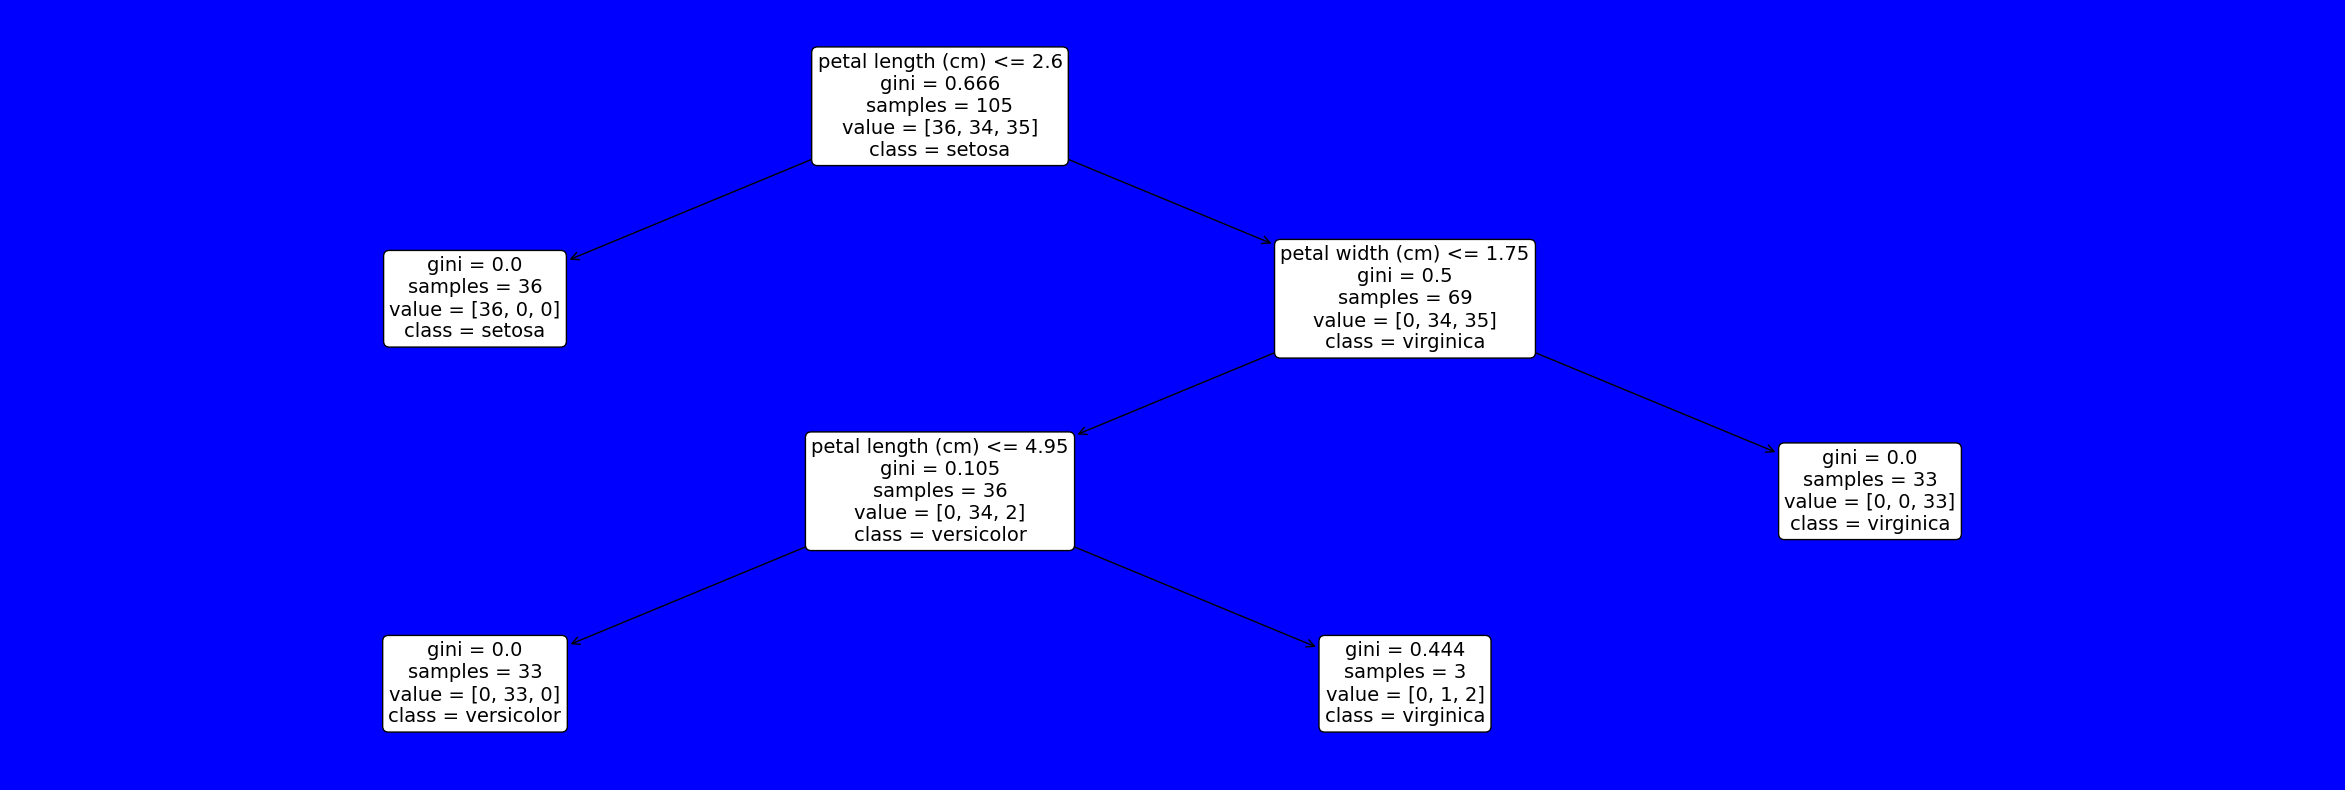

In [16]:
# Plotting the Decision Tree  
plt.figure(figsize = (30, 10), facecolor = 'b')  
Tree = tree.plot_tree(dtc, feature_names = names_features, class_names = target_labels, rounded = True, filled = True, fontsize = 14)  
plt.show()  

In [18]:
y_pred = dtc.predict(x_test)  
y_pred

array(['virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor'], dtype=object)

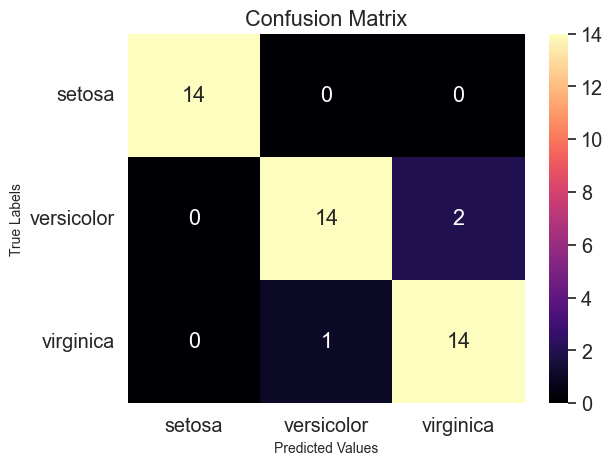

<Figure size 1000x700 with 0 Axes>

In [21]:
# Finding the confusion matrix  
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)  
matrix = pd.DataFrame(confusion_matrix)  
axis = plt.axes()  
sns.set(font_scale = 1.3)  
plt.figure(figsize = (10,7))

# Plotting heatmap  
sns.heatmap(matrix, annot = True, fmt = "g", ax = axis, cmap = "magma")  
axis.set_title('Confusion Matrix')  
axis.set_xlabel("Predicted Values", fontsize = 10)  
axis.set_xticklabels([''] + target_labels)  
axis.set_ylabel( "True Labels", fontsize = 10)  
axis.set_yticklabels(list(target_labels), rotation = 0)  
plt.show()  

In [24]:
# Predict the class probabilities for the test set
probabilities = dtc.predict_proba(x_test)
probabilities

array([[0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.

# Decision Tree Regression

In [25]:
# import numpy package for arrays and stuff
import numpy as np

# import matplotlib.pyplot for plotting our result
import matplotlib.pyplot as plt

# import pandas for importing csv files
import pandas as pd


In [26]:
# import dataset
# dataset = pd.read_csv('Data.csv')
# alternatively open up .csv file to read data

dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])

# print the dataset
print(dataset)


[['Asset Flip' '100' '1000']
 ['Text Based' '500' '3000']
 ['Visual Novel' '1500' '5000']
 ['2D Pixel Art' '3500' '8000']
 ['2D Vector Art' '5000' '6500']
 ['Strategy' '6000' '7000']
 ['First Person Shooter' '8000' '15000']
 ['Simulator' '9500' '20000']
 ['Racing' '12000' '21000']
 ['RPG' '14000' '25000']
 ['Sandbox' '15500' '27000']
 ['Open-World' '16500' '30000']
 ['MMOFPS' '25000' '52000']
 ['MMORPG' '30000' '80000']]


In [27]:
# select all rows by : and column 1
# by 1:2 representing features
X = dataset[:, 1:2].astype(int)

# print X
print(X)


[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]


In [28]:
# select all rows by : and column 2
# by 2 to Y representing labels
y = dataset[:, 2].astype(int)

# print y
print(y)


[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]


In [29]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X, y)


DecisionTreeRegressor(random_state=0)

In [30]:
# predicting a new value

# test the output by changing values, like 3750
y_pred = regressor.predict([[3750]])

# print the predicted price
print("Predicted price: % d\n"% y_pred)


Predicted price:  8000



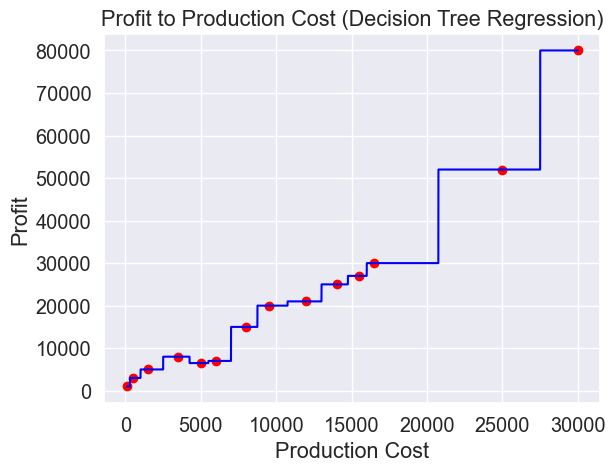

In [31]:
# arange for creating a range of values
# from min value of X to max value of X
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X), max(X), 0.01)

# reshape for reshaping the data into
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1))

# scatter plot for original data
plt.scatter(X, y, color = 'red')

# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

# specify title
plt.title('Profit to Production Cost (Decision Tree Regression)')

# specify X axis label
plt.xlabel('Production Cost')

# specify Y axis label
plt.ylabel('Profit')

# show the plot
plt.show()


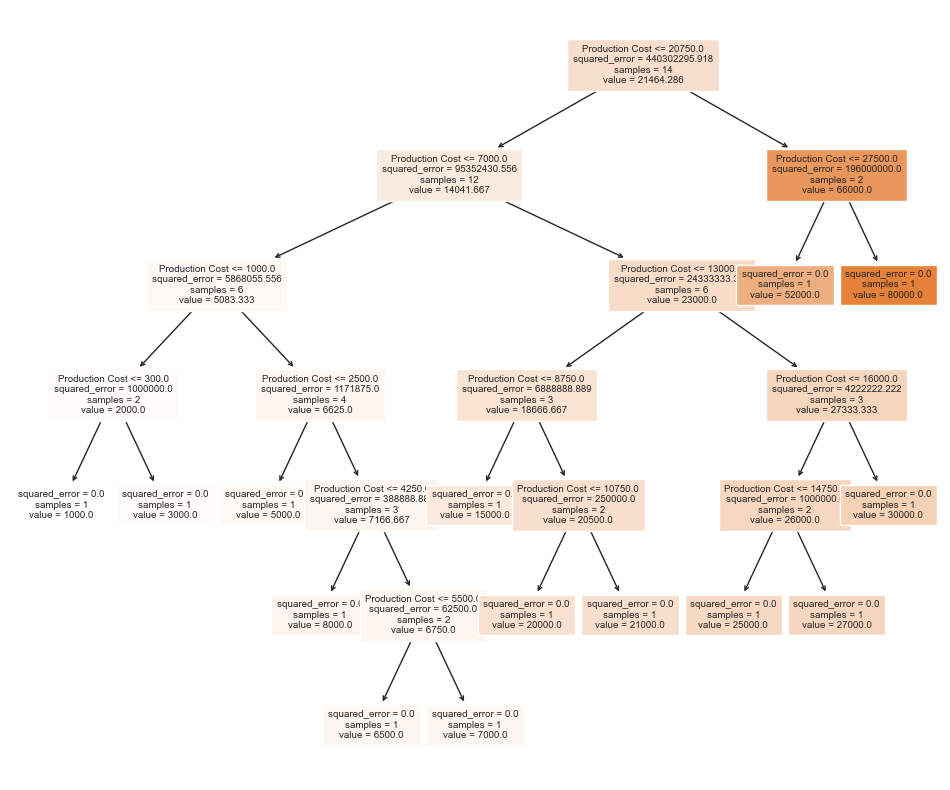

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(12, 10))  # Adjust the figure size as needed
plot_tree(regressor, feature_names=['Production Cost'], filled=True, fontsize=7)
#plt.savefig('decision_tree.png', dpi=300)  # Save the plot with higher dpi value
plt.show()



# The different colors in each node of the decision tree plot represent the class or target variable distribution at that 
# particular node. The color intensity indicates the predominant class or target variable value in that region of the 
# feature space.

# If you want to have a single color for the background of all the nodes, you can set the filled parameter to False when 
# calling the plot_tree function. Here's the updated code snippet:

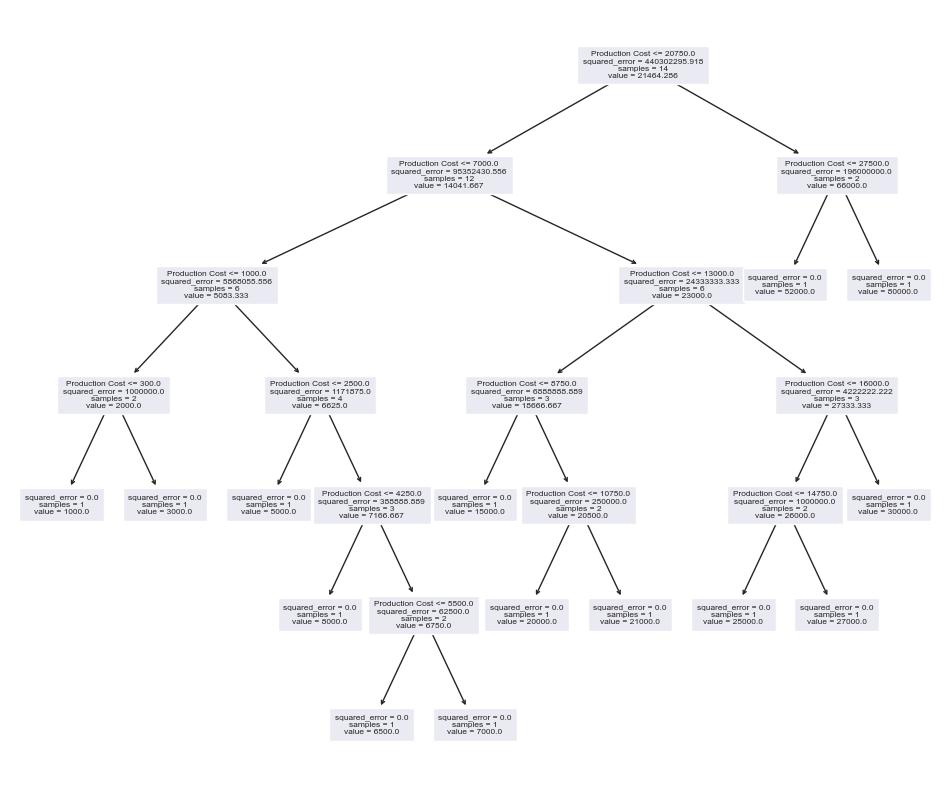

In [52]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(12, 10))  # Adjust the figure size as needed
plot_tree(regressor, feature_names=['Production Cost'], filled=False, fontsize=6)  # Set filled to False
# plt.savefig('decision_tree.png', dpi=300)  # Save the plot with higher dpi value
plt.show()


# Random Forest Classification

In [60]:
import pandas as pd

In [59]:
df = pd.read_csv("possum.csv")
df.sample(5, random_state=44)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
88,89,7,other,m,6.0,97.7,58.4,84.5,35.0,64.4,46.2,14.4,29.0,30.5
39,40,2,Vic,f,3.0,91.0,55.0,84.5,36.0,72.8,51.4,13.6,27.0,30.0
92,93,7,other,m,3.0,89.2,54.0,82.0,38.0,63.8,44.9,12.8,24.0,31.0
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
98,99,7,other,f,3.0,93.3,56.2,86.5,38.5,64.8,43.8,14.0,28.0,35.0


In [61]:
df = df.dropna()

In [62]:
X = df.drop(['case', 'site', 'Pop', 'sex'], axis = 1)
y = df['sex']

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)


# n_estimators determines the number of decision trees that make up our random forest. The more, the better.


# max_features defines the number of features that each decision tree takes into consideration at each split. If you read 
# the scikit-learn documentation, you’ll know that the default value for max_features is auto, which is actually the same 
# as sqrt (=the square root of the number of features)). Using sqrt is the recommended setting.

# You may wonder why there’s no setting for bootstrapping. Actually, there is one: bootstrap=True, but since it’s 
# the default setting, I’ve simply left it out

C:\Users\azturaje\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomForestClassifier(max_features='auto', random_state=44)

In [93]:
predictions = rf_model.predict(X_test)
predictions

array(['m', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'f', 'm',
       'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm',
       'm', 'm', 'm', 'm', 'f'], dtype=object)

In [94]:
rf_model.predict_proba(X_test)

array([[0.45, 0.55],
       [0.33, 0.67],
       [0.36, 0.64],
       [0.29, 0.71],
       [0.66, 0.34],
       [0.62, 0.38],
       [0.48, 0.52],
       [0.4 , 0.6 ],
       [0.17, 0.83],
       [0.35, 0.65],
       [0.49, 0.51],
       [0.52, 0.48],
       [0.39, 0.61],
       [0.44, 0.56],
       [0.48, 0.52],
       [0.36, 0.64],
       [0.42, 0.58],
       [0.52, 0.48],
       [0.39, 0.61],
       [0.1 , 0.9 ],
       [0.38, 0.62],
       [0.56, 0.44],
       [0.71, 0.29],
       [0.47, 0.53],
       [0.14, 0.86],
       [0.46, 0.54],
       [0.32, 0.68],
       [0.27, 0.73],
       [0.33, 0.67],
       [0.14, 0.86],
       [0.58, 0.42]])

In [95]:
rf_model.classes_

array(['f', 'm'], dtype=object)

In [96]:
rf_model.feature_importances_

array([0.05827368, 0.14475872, 0.10741986, 0.09753901, 0.0802824 ,
       0.14812675, 0.11386398, 0.10419812, 0.06523431, 0.08030316])

In [97]:
importances = rf_model.feature_importances_
columns = X.columns
i = 0

while i< len(columns):
    print(F"The importance of feature '{columns[i]}' is {round(importances[i]*100, 2)}%.")
    i += 1

The importance of feature 'age' is 5.83%.
The importance of feature 'hdlngth' is 14.48%.
The importance of feature 'skullw' is 10.74%.
The importance of feature 'totlngth' is 9.75%.
The importance of feature 'taill' is 8.03%.
The importance of feature 'footlgth' is 14.81%.
The importance of feature 'earconch' is 11.39%.
The importance of feature 'eye' is 10.42%.
The importance of feature 'chest' is 6.52%.
The importance of feature 'belly' is 8.03%.


In [98]:
new_possum = [[7.0, 83.2, 54.3, 81.0, 37.0, 70.0, 46.3, 14.7, 25.0, 32.0]]
rf_model.predict(new_possum)

C:\Users\azturaje\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array(['m'], dtype=object)

In [99]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [100]:
y_pred = rf_model.predict(X_test)


In [101]:
class_labels = ['f', 'm']
cm = confusion_matrix(y_test, y_pred, labels=class_labels)

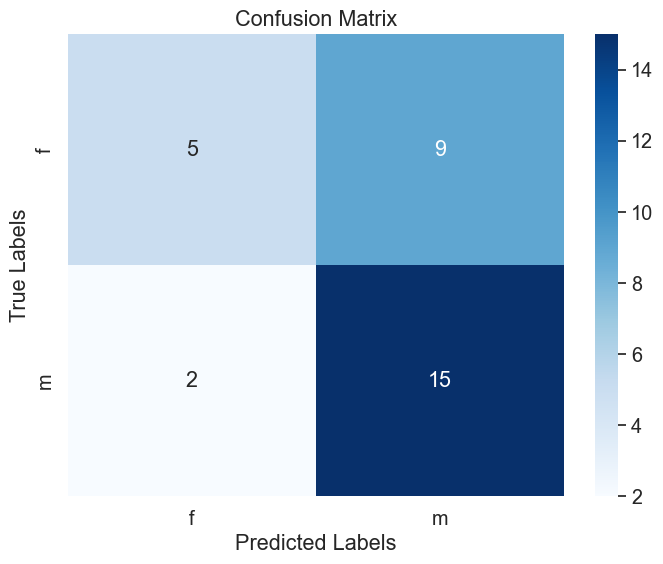

In [91]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Random Forest Classification vs Regression Model another example

In [110]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [111]:
df = pd.read_csv('heart_v2.csv')
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [112]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)
# Putting response variable to y
y = df['heart disease']

In [113]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

In [114]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape


((189, 4), (81, 4))

In [116]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [117]:
classifier_rf.oob_score_

# In a random forest model, the oob_score_ attribute represents the out-of-bag (OOB) score or out-of-bag estimate of 
# the model's accuracy.

0.656084656084656

In [118]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

In [120]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
# %%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [121]:
grid_search.best_score_


0.6985815602836879

In [122]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

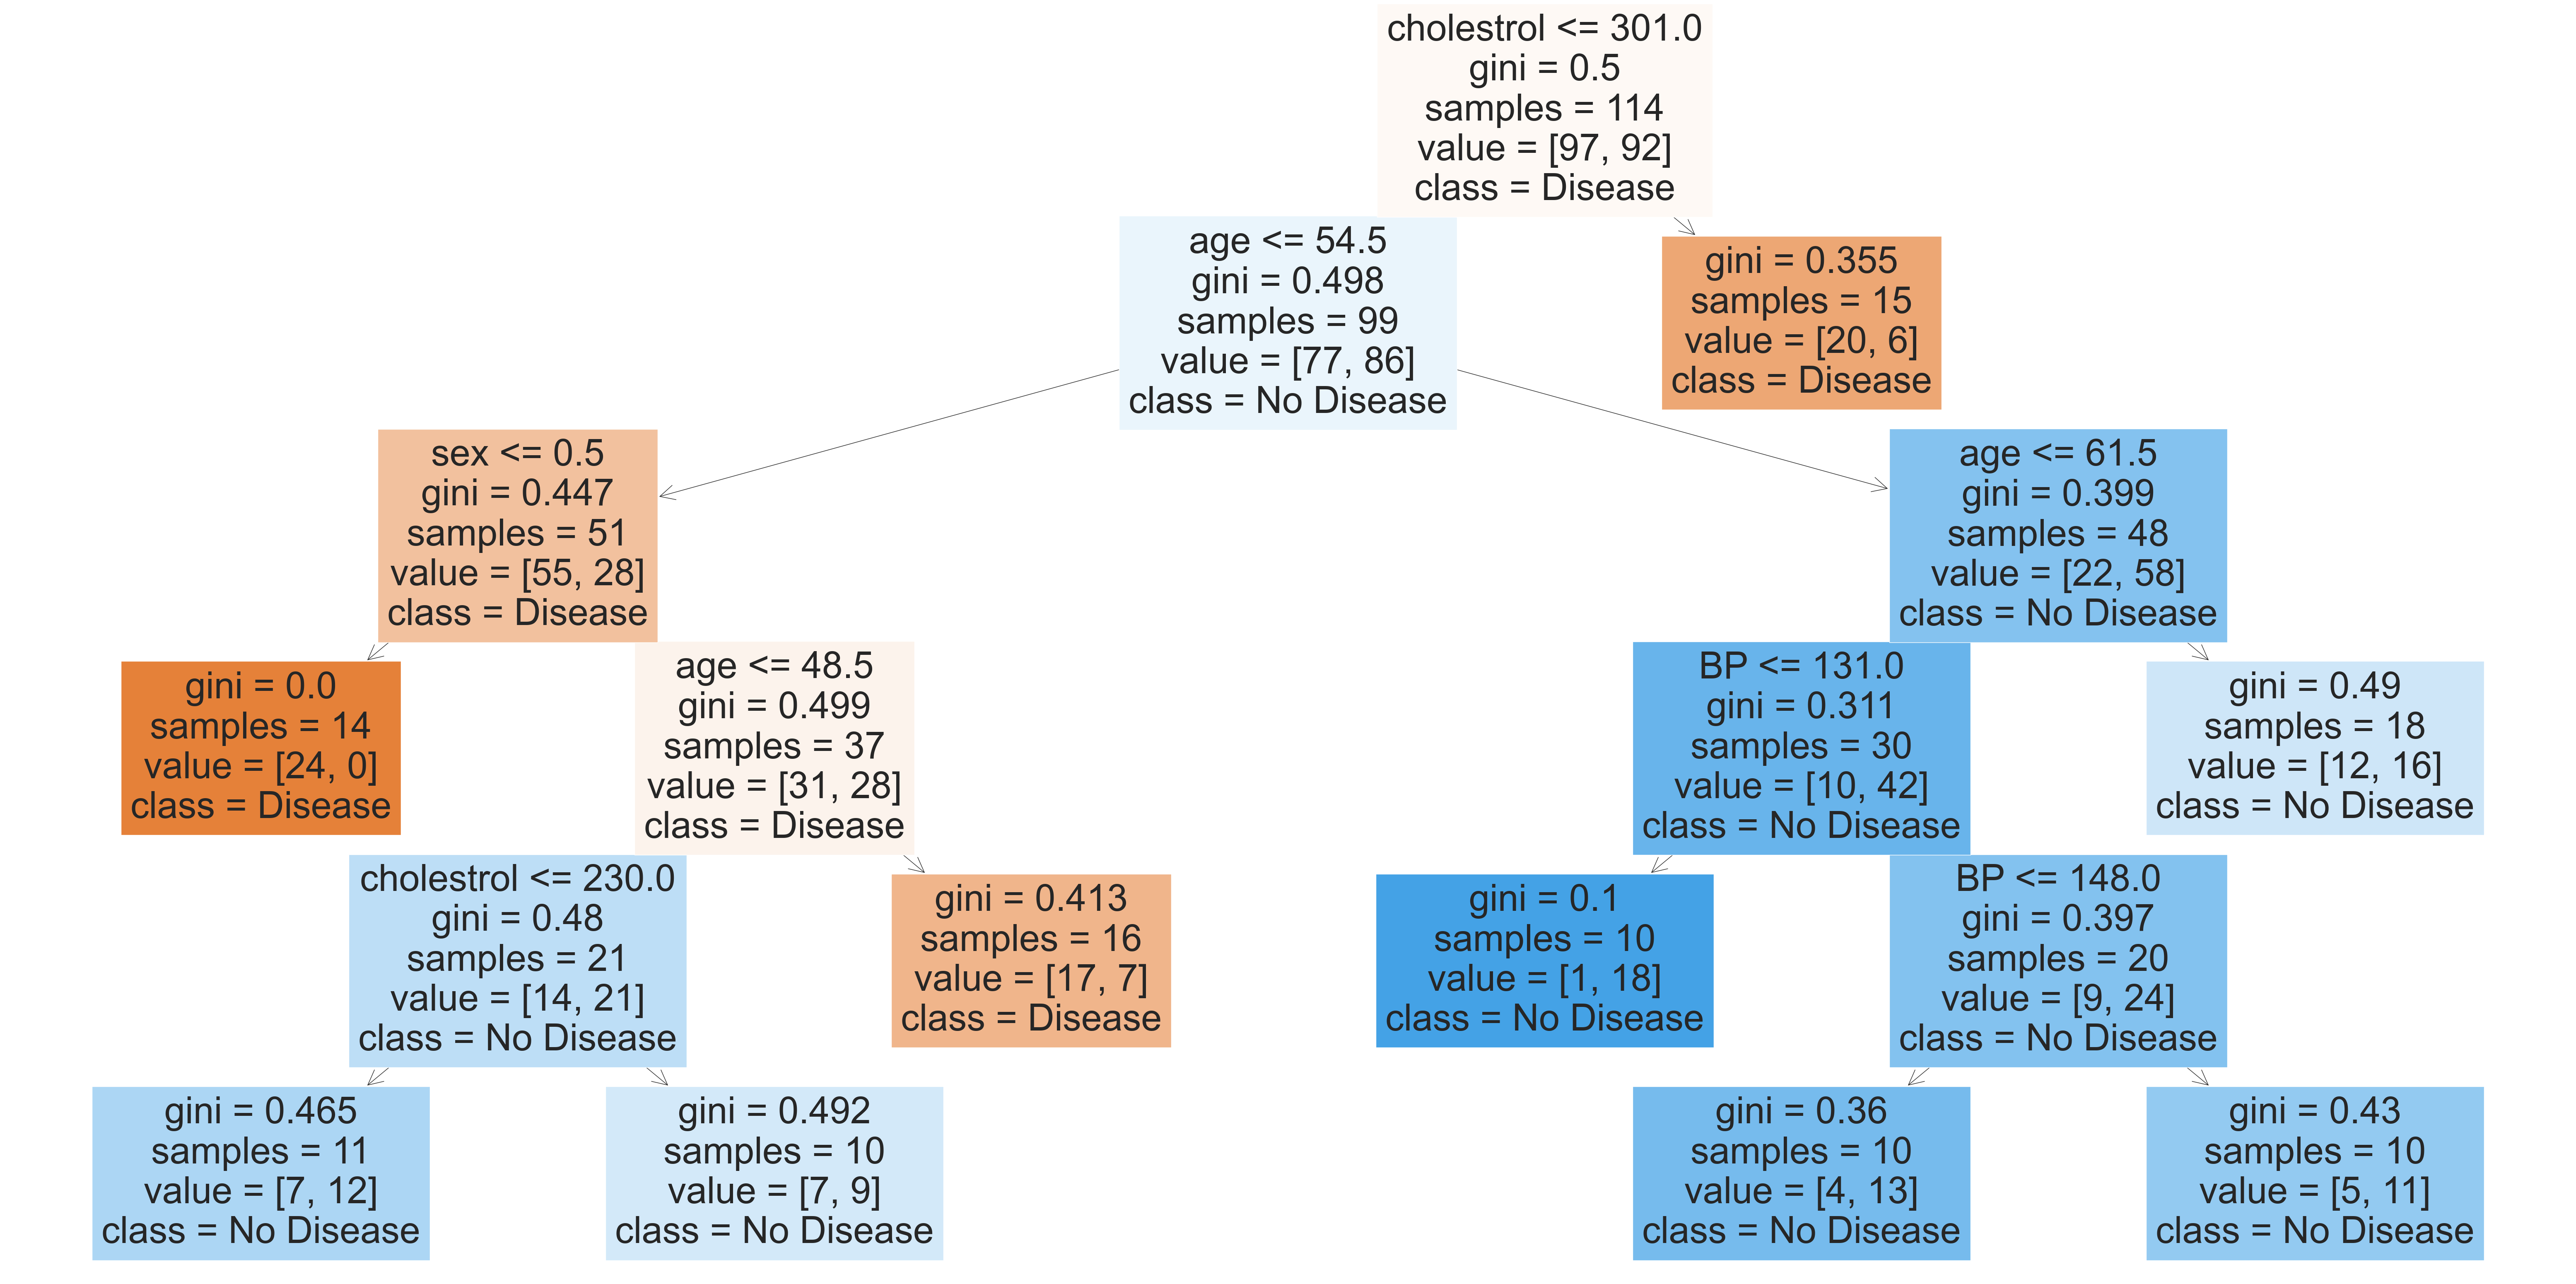

In [123]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

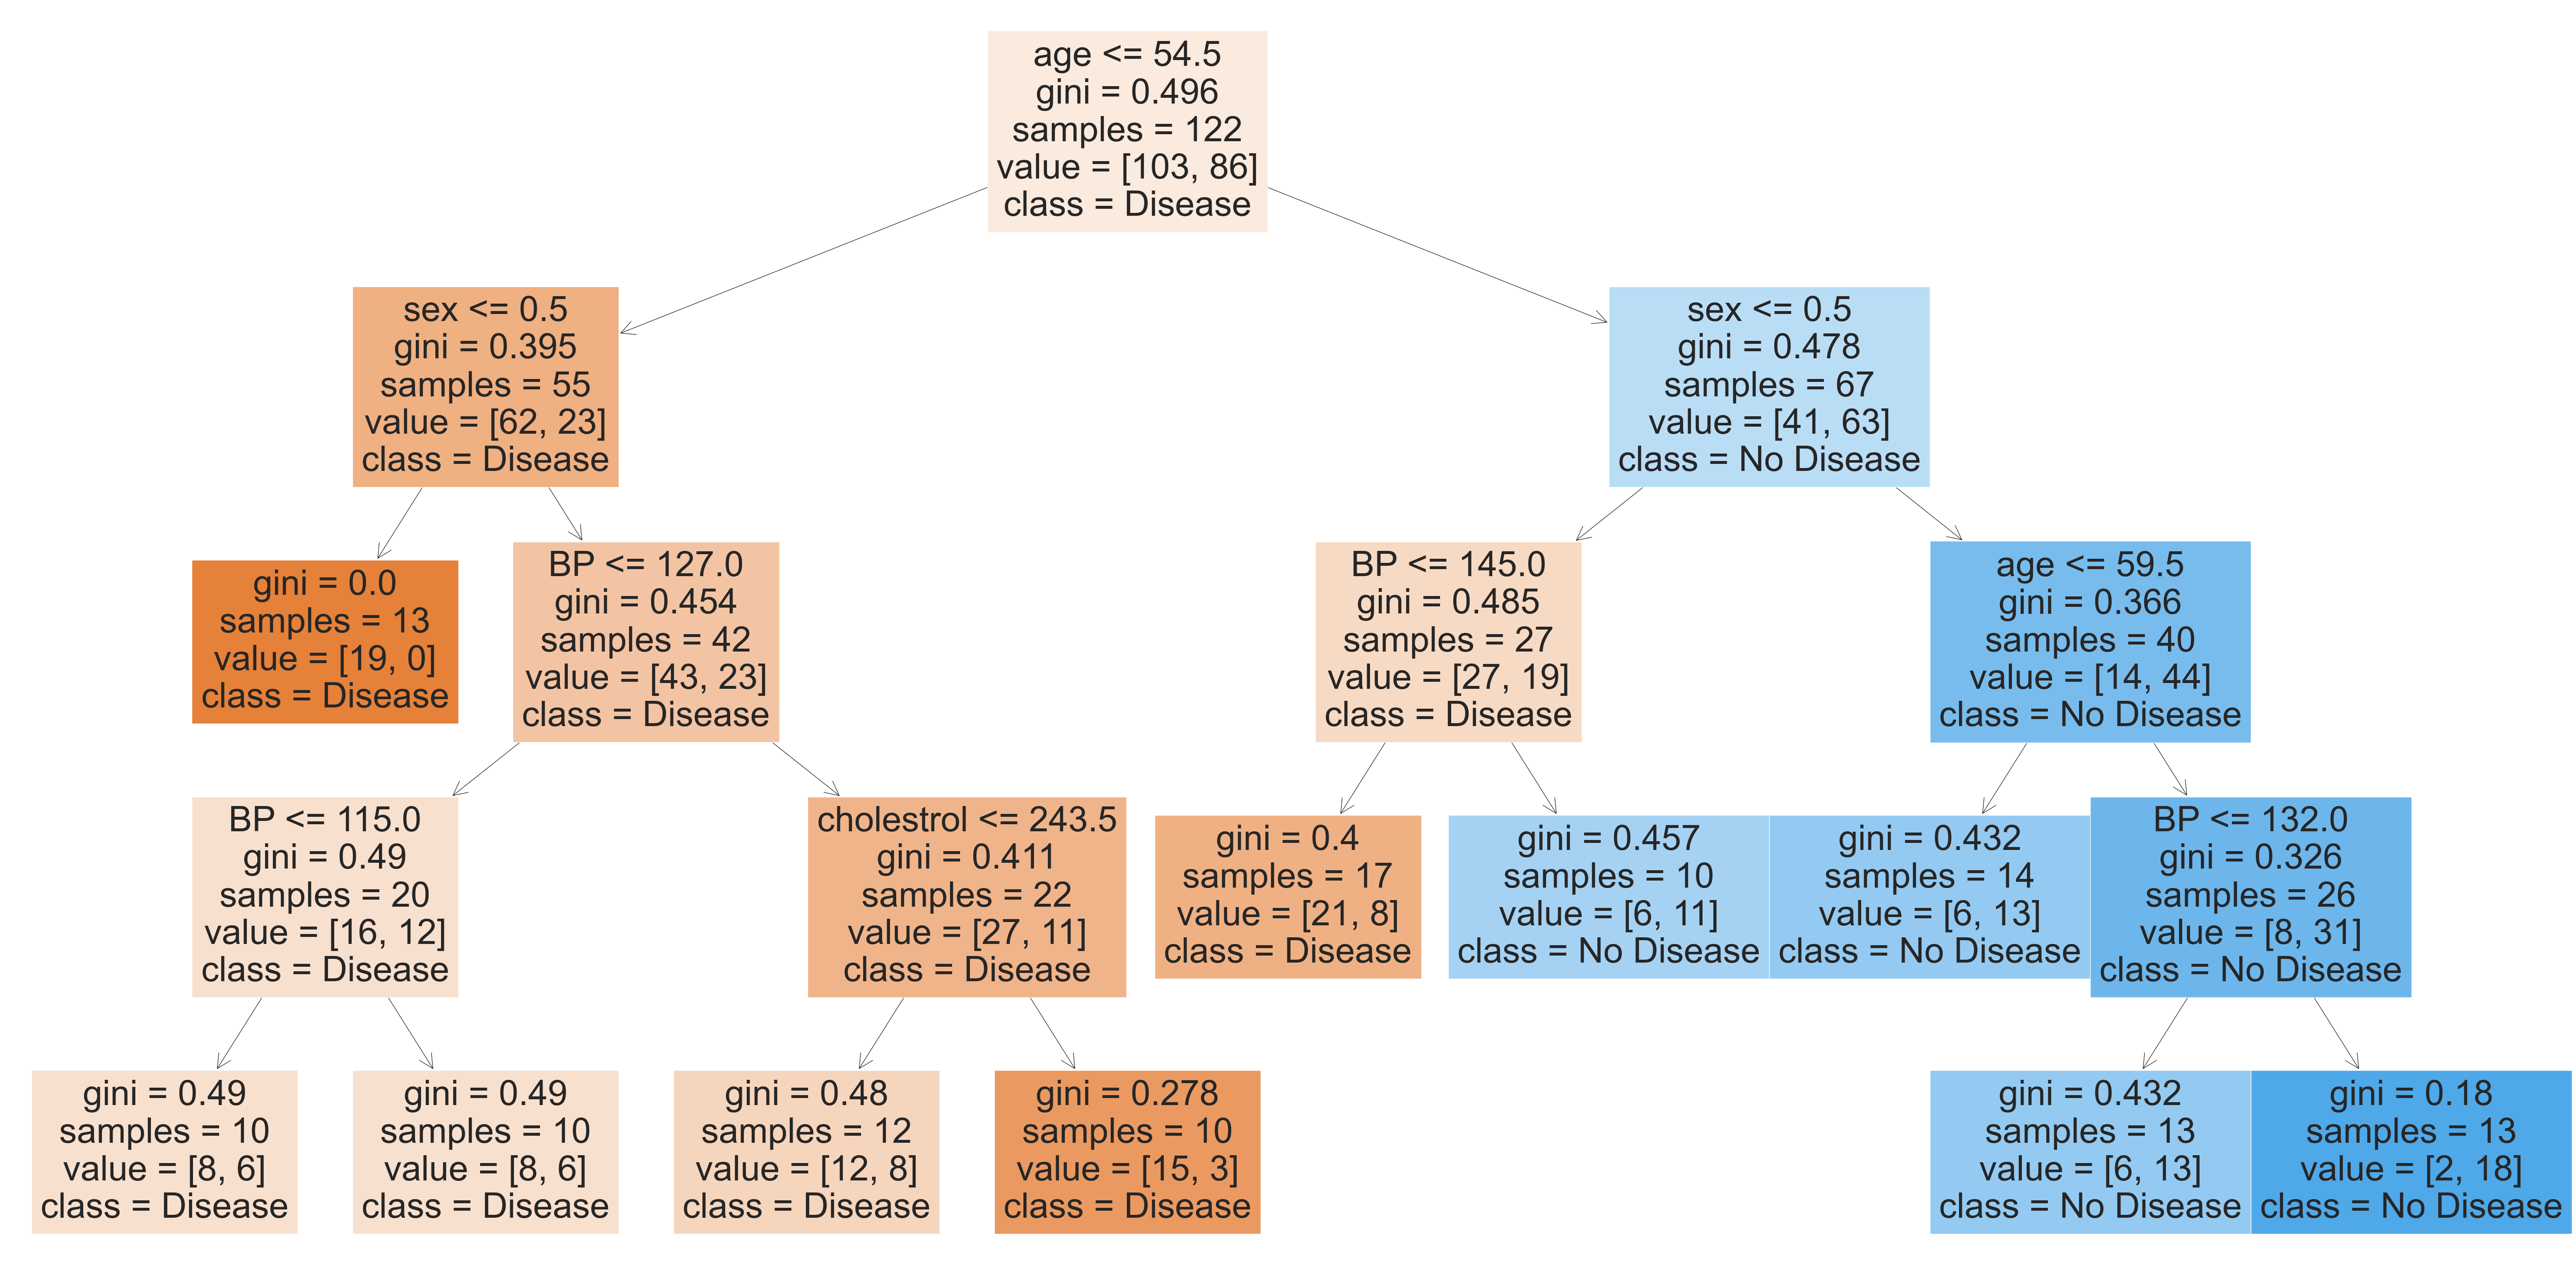

In [124]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

In [126]:
rf_best.feature_importances_
# feature importance
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746


In [127]:
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [128]:
X = df[['age', 'sex', 'BP', 'heart disease']]
y = df['cholestrol']

In [131]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X,y)

RandomForestRegressor(random_state=0)

In [132]:
regressor.feature_importances_
# feature importance
imp_df = pd.DataFrame({
    "Varname": X.columns,
    "Imp": regressor.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.449041
2,BP,0.399982
1,sex,0.079059
3,heart disease,0.071918


# Gradient Boosting (Classifier)

In [133]:
# https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/

In [135]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [136]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [137]:
y_train = train_data["Survived"]
train_data.drop(labels="Survived", axis=1, inplace=True)

In [144]:
full_data = pd.concat([train_data, test_data])
full_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [145]:
drop_columns = ["Name", "Age", "SibSp", "Ticket", "Cabin", "Parch", "Embarked"]
full_data.drop(labels=drop_columns, axis=1, inplace=True)

In [146]:
full_data = pd.get_dummies(full_data, columns=["Sex"])
full_data.fillna(value=0.0, inplace=True)
full_data

,PassengerId,Pclass,Fare,Sex_female,Sex_male
0,1,3,7.2500,False,True
1,2,1,71.2833,True,False
2,3,3,7.9250,True,False
3,4,1,53.1000,True,False
4,5,3,8.0500,False,True
...,...,...,...,...,...
413,1305,3,8.0500,False,True
414,1306,1,108.9000,True,False
415,1307,3,7.2500,False,True
416,1308,3,8.0500,False,True


In [147]:
X_train = full_data.values[0:891]
X_test = full_data.values[891:]

In [148]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [149]:
state = 12  
test_size = 0.30  
  
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)

In [150]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))
    
    
# we choose lr = 0.5 as the accuracy of validation is the highest among other lr values

Learning rate:  0.05
Accuracy score (training): 0.801
Accuracy score (validation): 0.731
Learning rate:  0.075
Accuracy score (training): 0.814
Accuracy score (validation): 0.731
Learning rate:  0.1
Accuracy score (training): 0.812
Accuracy score (validation): 0.724
Learning rate:  0.25
Accuracy score (training): 0.835
Accuracy score (validation): 0.750
Learning rate:  0.5
Accuracy score (training): 0.864
Accuracy score (validation): 0.772
Learning rate:  0.75
Accuracy score (training): 0.875
Accuracy score (validation): 0.754
Learning rate:  1
Accuracy score (training): 0.875
Accuracy score (validation): 0.739


In [151]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[142  19]
 [ 42  65]]
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       161
           1       0.77      0.61      0.68       107

    accuracy                           0.77       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.77      0.77      0.77       268



# XGBoost Classifier for the same dataset

In [152]:
from xgboost import XGBClassifier

In [159]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [160]:
score = xgb_clf.score(X_val, y_val)
print(score)

0.746268656716418


# Gradient Boosting Regressor

In [184]:
# Import the necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

In [185]:
# Setting SEED for reproducibility
SEED = 23

# Importing the dataset
X, y = load_diabetes(return_X_y=True)

In [186]:
# Splitting dataset
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = SEED)

In [187]:
# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(loss='absolute_error', learning_rate=0.1, n_estimators=300,
                                max_depth = 1, random_state = SEED,  max_features = 5)


In [188]:
# Fit to training set
gbr.fit(train_X, train_y)

GradientBoostingRegressor(loss='absolute_error', max_depth=1, max_features=5,
                          n_estimators=300, random_state=23)

In [189]:
# Predict on test set
pred_y = gbr.predict(test_X)

In [190]:
# test set RMSE
test_rmse = mean_squared_error(test_y, pred_y) ** (1 / 2)

# Print rmse
print('Root mean Square error: {:.2f}'.format(test_rmse))

Root mean Square error: 56.39


# XGBoost Regressor

In [208]:
# https://machinelearningmastery.com/xgboost-for-regression/

In [209]:
# check xgboost version
import xgboost
from sklearn.model_selection import RepeatedKFold

In [197]:
# create an xgboost regression model
model = xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


# n_estimators: The number of trees in the ensemble, often increased until no further improvements are seen.
# max_depth: The maximum depth of each tree, often values are between 1 and 10.
# eta: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.
# subsample: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.
# colsample_bytree: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features.

In [198]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())

(506, 14)
        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [202]:
# split data into input and output columns
X, y = dataframe.iloc[:, :-1], dataframe.iloc[:, -1]

In [206]:
# define model
model = xgboost.XGBRegressor()

In [218]:
# fit model
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [223]:
# # define model evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [224]:
# # force scores to be positive
# scores = abs(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [221]:
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
new_data = np.asarray([row])

In [222]:
# make a prediction
yhat = model.predict(new_data)
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 24.019


# ADA Boost Regression

In [228]:
# https://educationalresearchtechniques.com/2019/01/07/adaboost-regression-with-python/

In [225]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
from pydataset import data
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [226]:
df=data('cancer').dropna()
X=df[['time','sex','ph.karno','pat.karno','status','meal.cal']]
y=df['wt.loss']

In [227]:
df

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
6,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0
7,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0
8,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0
9,1.0,218,2,53,1,1.0,70.0,80.0,825.0,16.0
10,7.0,166,2,61,1,2.0,70.0,70.0,271.0,34.0
11,6.0,170,2,57,1,1.0,80.0,80.0,1025.0,27.0
15,12.0,567,2,57,1,1.0,80.0,70.0,2600.0,60.0
17,22.0,613,2,70,1,1.0,90.0,100.0,1150.0,-5.0


##### Baseline Regression Tree Model

The purpose of the baseline model is to compare it to the performance of our model that utilizes adaBoost. To make this model we need to Initiate a K-fold cross-validation. This will help in stabilizing the results. Next, we will create a for loop to create several trees that vary based on their depth. By depth, it is meant how far the tree can go to purify the classification. More depth often leads to a higher likelihood of overfitting.

Finally, we will then print the results for each tree. The criteria used for judgment is the mean squared error. Below is the code and results



Looks like a tree with a depth of 2 had the lowest amount of error (-176). We can now move to tuning the hyperparameters for the adaBoost algorithm.

In [229]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

for depth in range (1,10):
    tree_regressor=tree.DecisionTreeRegressor(max_depth=depth,random_state=1)
    if tree_regressor.fit(X,y).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_regressor,X,y,scoring='neg_mean_squared_error', cv=crossvalidation,n_jobs=1))
    print(depth, score)

1 -193.55304528235052
2 -176.27520747356175
3 -209.2846723461564
4 -218.80238479654003
5 -222.4393459885871
6 -249.95330609042858
7 -286.76842138165705
8 -294.0290706405905
9 -287.39016236497804


In [230]:
ada=AdaBoostRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)

In [231]:
search.fit(X,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [232]:
search.best_params_

{'learning_rate': 0.01, 'n_estimators': 500, 'random_state': 1}

In [233]:
search.best_score_

-165.10439582389532

In [234]:
# AdaBoost Regression Model. Below is our model, but this time with the refined hyperparameters.

ada2=AdaBoostRegressor(n_estimators=500,learning_rate=0.001,random_state=1)

In [235]:
score=np.mean(cross_val_score(ada2,X,y,scoring='neg_mean_squared_error',cv=crossvalidation,n_jobs=1))
score

-174.52604137201791

# ADA Boost Classification

In [259]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


In [260]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [261]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [262]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


In [263]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9555555555555556


In [264]:
model.classes_

array([0, 1, 2])

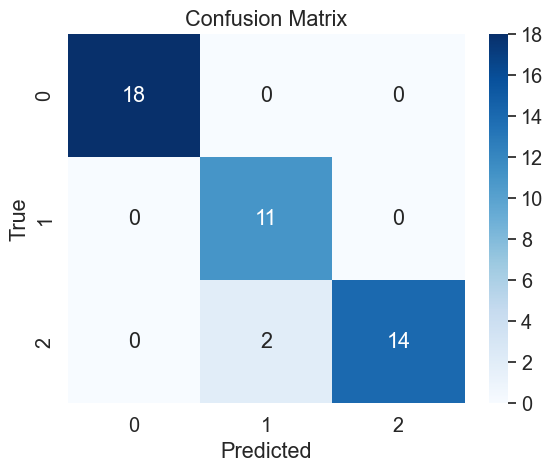

In [265]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Display the confusion matrix
plt.show()


# ADA Boost uses SVC as a base model 

## https://educationalresearchtechniques.com/2019/01/07/adaboost-regression-with-python/

In [266]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


C:\Users\azturaje\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Accuracy: 1.0


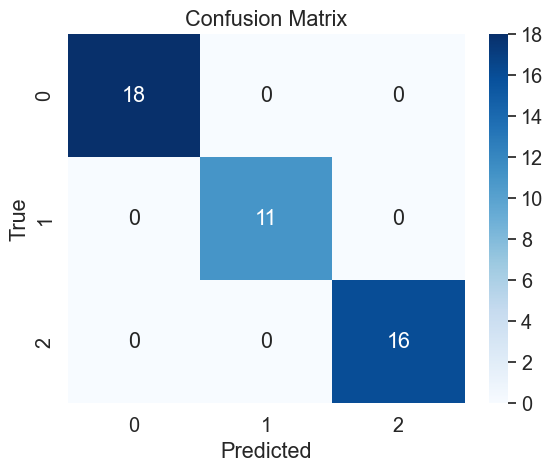

In [267]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Display the confusion matrix
plt.show()


# LightGBM Classifier

In [276]:
# https://www.projectpro.io/recipes/use-lightgbm-classifier-and-regressor-in-python

In [270]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import lightgbm as ltb

AttributeError: module 'pandas.core.strings' has no attribute 'StringMethods'

In [ ]:
dataset = datasets.load_wine()
X = dataset.data 
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
model = ltb.LGBMClassifier()
model.fit(X_train, y_train)
print(); print(model)
    
expected_y  = y_test
predicted_y = model.predict(X_test)